## **Воркшоп по API**

### **Работа с ТВ-шоу через REST API**

https://api.tvmaze.com - публичный API с данными о ТВ-шоу, сериалах и актерах

#### **Задание № 1**

С помощью TVMaze API выгрузите данные о всех имеющихся шоу со страницы с индексом 0. Постройте гистограмму, показывающую распределение шоу по годам премьеры. Проанализируйте гистограмму и сделайте выводы.

In [1]:
# подключаем необходимые библиотеки
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# URL для получения данных о всех ТВ-шоу со страницы с индексом 0
url = "https://api.tvmaze.com/shows?page=0"

In [4]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url)
# преобразуем JSON в список
shows_list = response.json()

In [5]:
# выводим на экран названия всех шоу
for show in shows_list:
    print(show['name'])

Under the Dome
Person of Interest
Bitten
Arrow
True Detective
The 100
Homeland
Glee
Revenge
Grimm
Gotham
Lost Girl
The Flash
Continuum
Constantine
Penny Dreadful
The Amazing Race
Supernatural
The Strain
The Last Ship
True Blood
Once Upon a Time in Wonderland
Hawaii Five-0
Hellsing
Hellsing Ultimate
Berserk
Californication
Vikings
American Horror Story
Marvel's Agents of S.H.I.E.L.D.
Fargo
Hemlock Grove
Helix
The Killing
Intruders
Z Nation
Resurrection
Death Note
Last Man Standing
Sleepy Hollow
Outlander
Scorpion
NCIS: New Orleans
Forever
Witches of East End
Madam Secretary
Brooklyn Nine-Nine
The Lottery
The Knick
How to Get Away with Murder
Nashville
Legends
Red Band Society
Chicago P.D.
black-ish
New Girl
Chicago Fire
NCIS
Orphan Black
The Originals
The Vampire Diaries
Utopia
Bones
The Big Bang Theory
Grey's Anatomy
Castle
The Blacklist
The Voice
Dancing with the Stars
NCIS: Los Angeles
The Walking Dead
Hell on Wheels
The Mindy Project
Sons of Anarchy
The Middle
The Mysteries of Laura

In [6]:
# создаем DataFrame на основании полученного списка
df = pd.DataFrame(shows_list)

In [7]:
# выводим общую информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              240 non-null    int64  
 1   url             240 non-null    object 
 2   name            240 non-null    object 
 3   type            240 non-null    object 
 4   language        240 non-null    object 
 5   genres          240 non-null    object 
 6   status          240 non-null    object 
 7   runtime         229 non-null    float64
 8   averageRuntime  240 non-null    int64  
 9   premiered       240 non-null    object 
 10  ended           218 non-null    object 
 11  officialSite    167 non-null    object 
 12  schedule        240 non-null    object 
 13  rating          240 non-null    object 
 14  weight          240 non-null    int64  
 15  network         229 non-null    object 
 16  webChannel      14 non-null     object 
 17  dvdCountry      1 non-null      obj

In [8]:
# создаем серию с годами выхода всех шоу
years = pd.to_datetime(df['premiered'], errors='coerce').dt.year

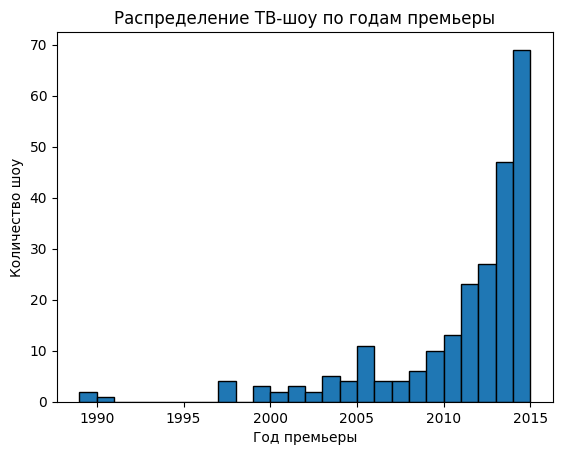

In [9]:
# строим гистограмму с распределением шоу по годам премьеры
years.dropna().astype(int).plot.hist(
    bins=range(int(years.min()), int(years.max()) + 2),
    edgecolor='black'
)
plt.title('Распределение ТВ-шоу по годам премьеры')
plt.xlabel('Год премьеры')
plt.ylabel('Количество шоу')
plt.show()

**Выводы по графику**:На гистограмме видно, что количество ТВ-шоу значительно увеличилось после 2010 года. Это свидетельствует о росте популярности и активном развитии индустрии сериалов в последние годы.

#### **Задание № 2**

С помощью TVMaze API выгрузите все данные о шоу, где в названии есть слово "друзья" (friends). На основании полученных данных постройте Sunburst-диаграмму с иерархией Язык → Жанр → Название.

In [31]:
# подключаем Plotly для построения Sunburst-диаграммы
import plotly.express as px
import pandas as pd
import requests

In [32]:
# URL для получения списка ТВ-шоу, где в названии есть слово "друзья (friends)"
url = "https://api.tvmaze.com/search/shows?q=friends"

In [33]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url)
# преобразуем JSON в список
shows_list = response.json()

In [34]:
# выводим на экран количество выгруженных шоу
print("Количество выгруженных шоу:", len(shows_list))

Количество выгруженных шоу: 10


In [35]:
# создаем список с данными по каждому шоу
shows_data = []
for show in shows_list:
    info = show['show']
    shows_data.append({
        'name': info['name'],
        'language': info['language'],
        'genres': info['genres'],
    })

In [36]:
# формируем DataFrame на основании списка с данными по каждому шоу
df = pd.DataFrame(shows_data)

In [37]:
# заполняем пропуски в столбце genres
df['genres'] = df['genres'].apply(lambda x: x if x else ['Не указан'])

In [ ]:
# оставляем только один жанр для корректного построения Sunburst-диаграммы
df_expanded = df.explode('genres')

In [41]:
# строим Sunbursts-диаграмму
for col in ['language', 'genres', 'name']:
    df_expanded[col] = df_expanded[col].fillna('Unknown')
    df_expanded[col] = df_expanded[col].replace('', 'Unknown')
fig = px.sunburst(
    df_expanded,
    path=['language', 'genres', 'name'],
    title="Sunburst-диаграмма для шоу с 'friends' в названии"
)
fig.show()

#### **Задание № 3**

С помощью TVMaze API выгрузите данные о всех эпизодах сериала "Сверхъестественное", который выходил с 2005 по 2020 гг. Найдите серии с минимальным и максимальным средними рейтингами, а также постройте столбчатую диаграмму со средними рейтингами каждого сезона. Проанализируйте полученный график и сделайте выводы.

In [16]:
# URL для получения списка ТВ-шоу, где в названии есть слово "сверхъестественное (supernatural)"
url_show = "https://api.tvmaze.com/search/shows?q=supernatural"

In [17]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url_show)
# преобразуем JSON в список
shows_list = response.json()

In [18]:
# сохраняем id сериала "Сверхъестественное"
show_id = shows_list[0]['show']['id']
print(show_id)

19


In [19]:
# URL для получения списка эпизодов сериала "Сверхъестественное"
url_episodes = f"https://api.tvmaze.com/shows/{show_id}/episodes"

In [20]:
# отправляем GET-запрос и получаем ответ в формате JSON
response = requests.get(url_episodes)
# преобразуем JSON в список
episodes_list = response.json()

In [21]:
# формируем DataFrame на основании списка с данными по каждой серии
df = pd.DataFrame(episodes_list)

In [22]:
# находим данные о серии с минимальным рейтингом
min_rating_row = df.loc[df['rating'].apply(lambda x: x['average']).idxmin()]
print("Минимальный рейтинг:", min_rating_row['rating']['average'])
print("Сезон:", min_rating_row['season'], "Эпизод:", min_rating_row['number'], min_rating_row['name'])

Минимальный рейтинг: 6.3
Сезон: 10 Эпизод: 4 Paper Moon


In [23]:
# находим данные о серии с максимальным рейтингом
max_rating_row = df.loc[df['rating'].apply(lambda x: x['average']).idxmax()]
print("Максимальный рейтинг:", max_rating_row['rating']['average'])
print("Сезон:", max_rating_row['season'], "Эпизод:", max_rating_row['number'], max_rating_row['name'])

Максимальный рейтинг: 9.3
Сезон: 2 Эпизод: 22 All Hell Breaks Loose (2)


In [24]:
# группируем данные и вычисляем средний рейтинг для каждого сезона
df['avg_rating'] = df['rating'].apply(lambda x: x['average'])
season_avg = df.groupby('season')['avg_rating'].mean()

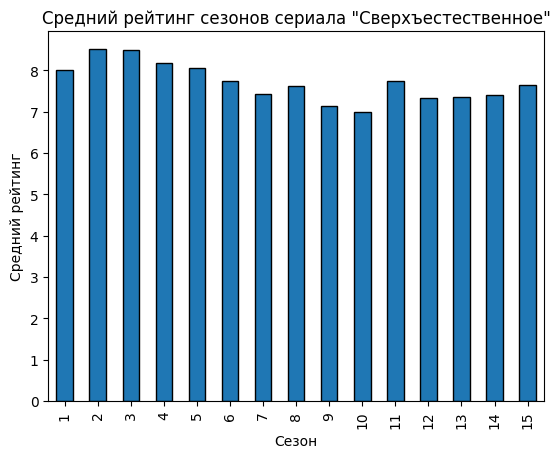

In [25]:
# строим столбчатую диаграмму рейтинга сезонов сериала "Сверхъестественное"
season_avg.plot(kind='bar', edgecolor='black')
plt.title('Средний рейтинг сезонов сериала "Сверхъестественное"')
plt.xlabel('Сезон')
plt.ylabel('Средний рейтинг')
plt.show()

**Выводы по графику**:На графике видно, что средние рейтинги сезонов «Сверхъестественного» были наиболее высокими в первые годы сериала, особенно во 2 и 3 сезонах. Начиная с 6 сезона отмечается постепенное снижение рейтингов, что может указывать на спад интереса аудитории или изменение качества сюжета. Однако последние сезоны показывают небольшой рост, что может быть связано с возвращением интереса зрителей к финалу сериала.

### **Работа с GitHub API через GraphQL**

https://api.github.com/graphql - базовый адрес для GraphQL-запросов к GitHub

https://docs.github.com/ru/graphql - документация GitHub GraphQL API

#### **Задание 4**

С помощью GitHub API через GraphQL выгрузите данные о следующих репозиториях:
Автор | Название репозитория
------|---------------------
pallets | flask
django | django
numpy | numpy
pandas-dev | pandas
tiangolo | fastapi

На основании выгруженных данных постройте столбчатую диаграмму, отображающую количество звезд для указанных репозиториев.

In [ ]:
# персональный токен GitHub
GITHUB_TOKEN = ''

In [13]:
# базовый адрес для GraphQL-запросов к GitHub
GITHUB_API_URL = "https://api.github.com/graphql"

**Bearer** - это тип токена, который указывает, что доступ к ресурсу предоставляется по персональному токеном. Является обязательным механизмом при работе с GitHub API через GraphQL. 

In [14]:
headers = {"Authorization": f"bearer {GITHUB_TOKEN}"}

In [15]:
# список кортежей (владелец, имя репозитория), для которых нужно получить число звезд
repos = [
    ('pallets', 'flask'),
    ('django', 'django'),
    ('numpy', 'numpy'),
    ('pandas-dev', 'pandas'),
    ('tiangolo', 'fastapi')
]

In [16]:
# шаблон запроса GraphQL, в который подставляются owner (владелец) и name (название) каждого репозитория
query_template = """
query($owner: String!, $name: String!) {
  repository(owner: $owner, name: $name) {
    name
    owner { login }
    stargazerCount
  }
}
"""

In [22]:
import requests
# список для хранения данных о репозиториях
data = []
# перебираем репозитории вместе с именами владельцев
for owner, name in repos:
    # подставляем имена владельцев и названия репозиториев в шаблон
    variables = {"owner": owner, "name": name}
    # отправляем POST-запрос
    response = requests.post(
        GITHUB_API_URL,
        json={"query": query_template, "variables": variables},
        headers=headers
    )
    result = response.json()
    print(f"{owner}/{name}: {result}")  # <- Вот это обязательно!

    if 'errors' in result:
        print(f"Ошибка для {owner}/{name}: {result['errors']}")
        continue
    # извлекем из полученного ответа информацию о репозитории
    repo = response.json()["data"]["repository"]
    # добавляем в список словарь с именем репозитория и количеством звезд
    data.append({"repo": repo["name"], "stars": repo["stargazerCount"]})

pallets/flask: {'data': {'repository': {'name': 'flask', 'owner': {'login': 'pallets'}, 'stargazerCount': 69719}}}
django/django: {'data': {'repository': {'name': 'django', 'owner': {'login': 'django'}, 'stargazerCount': 83865}}}
numpy/numpy: {'data': {'repository': {'name': 'numpy', 'owner': {'login': 'numpy'}, 'stargazerCount': 29664}}}
pandas-dev/pandas: {'data': {'repository': {'name': 'pandas', 'owner': {'login': 'pandas-dev'}, 'stargazerCount': 45675}}}
tiangolo/fastapi: {'data': {'repository': {'name': 'fastapi', 'owner': {'login': 'fastapi'}, 'stargazerCount': 86137}}}


In [23]:
# формируем DataFrame на основании списка с данными о репозиториях
import pandas as pd
df = pd.DataFrame(data)
print(df)

      repo  stars
0    flask  69719
1   django  83865
2    numpy  29664
3   pandas  45675
4  fastapi  86137


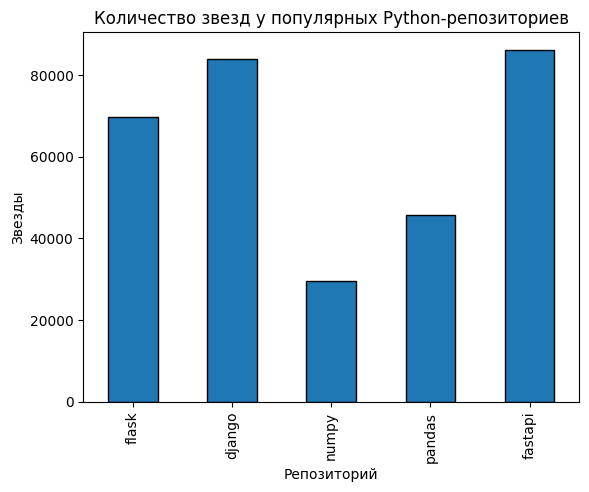

In [24]:
# строим столбчатую диаграмму для отображения количества звезд популярных репозиториев GitHub
import matplotlib.pyplot as plt

df.set_index('repo')['stars'].plot(kind='bar', edgecolor='black')
plt.title('Количество звезд у популярных Python-репозиториев')
plt.xlabel('Репозиторий')
plt.ylabel('Звезды')
plt.show()

#### **Задание № 5**

С помощью GitHub API через GraphQL для репозитория vscode (автор microsoft) выгрузите последние 100 опубликованных issues. Постройте линейный график, отображающий количества созданных issues по часам. Проанализируйте полученный график и сделайте выводы.

**issues** - встроенная система обсуждений, задач и отслеживания ошибок в репозиториях GitHub

In [25]:
# запрос на получение последних 100 issues из репозитория vscode, которым владеет microsoft
query = """
{
  repository(owner: "microsoft", name: "vscode") {
    issues(last: 100, states: OPEN) {
      nodes {
        title
        createdAt
        number
      }
    }
  }
}
"""

In [26]:
# отправляем POST-запрос
response = requests.post(
    GITHUB_API_URL,
    json={"query": query},
    headers=headers
)
# извлекаем из полученного ответа информацию о созданных issues
issues = response.json()["data"]["repository"]["issues"]["nodes"]

In [27]:
# преобразуем полученный список в датафрейм
import pandas as pd
df = pd.DataFrame(issues)

In [28]:
# преобразуем столбец createdAt в формат datetime
df['createdAt'] = pd.to_datetime(df['createdAt'])
# создаем столбец с часами, округляя вниз
df['hour'] = df['createdAt'].dt.hour

In [29]:
# группируем данные и подсчитываем количество issues для каждого часа
issues_by_hour = df.groupby('hour').size()

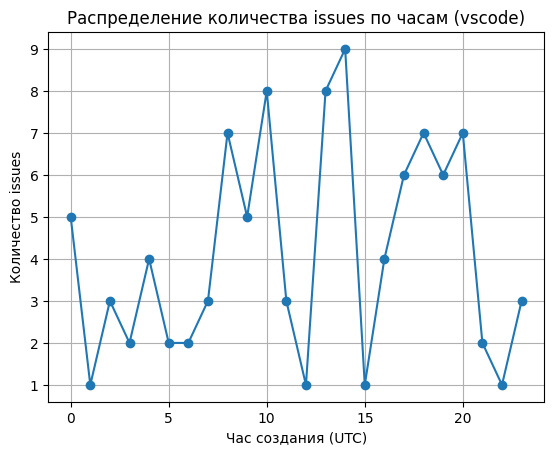

In [30]:
# строим линейный график для отображения количества созданных issues по часам в репозитории vscode
import matplotlib.pyplot as plt
issues_by_hour.plot(kind='line', marker='o')
plt.title('Распределение количества issues по часам (vscode)')
plt.xlabel('Час создания (UTC)')
plt.ylabel('Количество issues')
plt.grid(True)
plt.show()

**Выводы по графику**:На графике видно, что новые issues создаются практически в течение всех часов суток, однако пики обращаемости пользователей приходятся на определённые часы. Это может быть связано с часовыми поясами, а также с активностью основной аудитории проекта.